In [1]:
!pip install pyspark faker

     |████████████████████████████████| 281.3 MB 36 kB/s 
     |████████████████████████████████| 1.2 MB 41.4 MB/s 
     |████████████████████████████████| 198 kB 59.0 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.0-py2.py3-none-any.whl size=281805912 sha256=fb717c2656a18da94f84a72602d5e391bb53e960e0b2eebac1109cee14ad7c55
  Stored in directory: /root/.cache/pip/wheels/0b/de/d2/9be5d59d7331c6c2a7c1b6d1a4f463ce107332b1ecd4e80718
Successfully built pyspark


In [2]:
import pandas as pd
from random import randint, random, uniform, choice

from pyspark.sql import Row, SparkSession

from datetime import datetime, date
from faker import Faker




In [3]:

fake = Faker()
spark_session = SparkSession.builder.getOrCreate()
users_df = spark_session.createDataFrame([
    Row(
        name=fake.text(50),
        author=fake.first_name()+fake.last_name(),
        user_rating=uniform(3, 5),
        reviews=randint(10000, 20000),
        price=randint(9, 15),
        year=randint(1925, 2020),
        genre=choice(['Fiction', 'NotFiction'])
    )
    for i in range(500)
])

In [ ]:
#books.columns = ['name', 'author', 'user_rating', 'reviews', 'price', 'year', 'genre']

In [4]:
users_df.show()

+--------------------+--------------+------------------+-------+-----+----+----------+
|                name|        author|       user_rating|reviews|price|year|     genre|
+--------------------+--------------+------------------+-------+-----+----+----------+
|Education hold th...|      AllenCox| 3.840107439411736|  16605|    9|1984|NotFiction|
|Among professor h...|   ShawnHarper|  4.45392794694889|  18206|   12|2008|   Fiction|
|Tonight scene str...|   AndreaLopez|  4.79307715884293|  14069|   10|1983|   Fiction|
|Effect write give...| DanielJimenez| 4.492876420815308|  15658|   11|1933|   Fiction|
|Air certain born ...|   RobertOlson| 4.293079755770879|  14425|   13|1973|   Fiction|
|Job water main le...|    KevinIrwin|3.6122815398959576|  17988|    9|2008|   Fiction|
|Hot skin chance s...|WilliamJohnson|3.3320940724545682|  14453|   15|1926|   Fiction|
|Them data law wor...|MelissaAguilar| 4.227601583513369|  12329|    9|1971|   Fiction|
|Data visit any wi...| PhillipFlores|3.6544

In [5]:
from pyspark.sql.functions import mean, stddev, round as _round
pd1 = users_df.filter('user_rating >4.7').select(mean('price'))
pd1.show()

+------------------+
|        avg(price)|
+------------------+
|12.164383561643836|
+------------------+



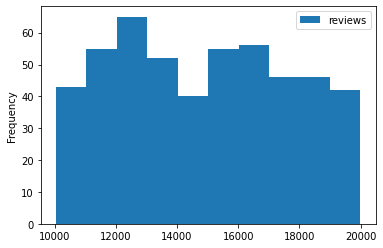

In [88]:
users_df.select(["reviews"]).toPandas().plot(kind="hist")

In [7]:
pd2 = users_df.select('user_rating', 'reviews', 'price')
pd2.toPandas().corr()

,user_rating,reviews,price
user_rating,1.000000,-0.015409,0.012098
reviews,-0.015409,1.000000,0.030658
price,0.012098,0.030658,1.000000


In [8]:
import seaborn as sns

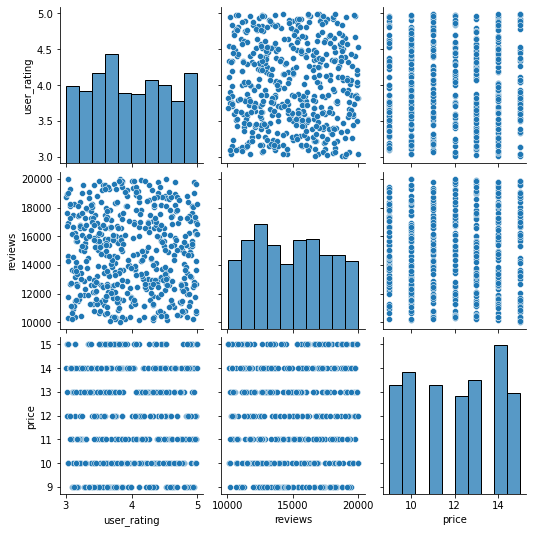

In [9]:
pd3 = users_df.select('user_rating', 'reviews', 'price').toPandas()
sns.pairplot(pd3)

ЗАДАНИЕ2

In [47]:
users_df.createOrReplaceTempView("Users")

In [61]:
spark_session.sql("""
      Select 
      author, user_rating
      From Users
      Order by user_rating desc
      Limit 1       
    """).show()

+-----------------+------------------+
|           author|       user_rating|
+-----------------+------------------+
|ZacharyValenzuela|4.9929993440744935|
+-----------------+------------------+



In [62]:
spark_session.sql("""
      Select 
      author, user_rating
      From Users
      Order by user_rating
      Limit 3       
    """).show()

+-------------+------------------+
|       author|       user_rating|
+-------------+------------------+
|  RobertMason|3.0055917717308054|
|JasonAnderson| 3.012031040456293|
|    TaraAdams|3.0141362694662366|
+-------------+------------------+



In [63]:
spark_session.sql("""
      Select 
      author, reviews
      From Users
      Order by reviews desc
      Limit 1       
    """).show()

+--------------+-------+
|        author|reviews|
+--------------+-------+
|ColleenEsparza|  19990|
+--------------+-------+



In [84]:
spark_session.sql("""
      Select 
      reviews, name
      From Users
      Order By author      
    """).show()

+-------+--------------------+
|reviews|                name|
+-------+--------------------+
|  13576|Nation order bene...|
|  13428|None shoulder car...|
|  13862|Cause commercial ...|
|  11163|Knowledge team qu...|
|  13568|Reality guy human...|
|  14684|Box impact Republ...|
|  12451|Form almost into ...|
|  14945|Available interna...|
|  11542|List for brother ...|
|  16683|Field modern scor...|
|  16605|Education hold th...|
|  11548|Low protect posit...|
|  11979|Rather suffer mac...|
|  14609|Camera blood nigh...|
|  11394|Whom apply grow w...|
|  17592|Region garden of ...|
|  19291|Fight although po...|
|  16097|Painting focus th...|
|  17272|Thought provide l...|
|  15749|Until already hit...|
+-------+--------------------+
only showing top 20 rows



In [73]:
spark_session.sql("""
      Select 
      name, author, user_rating, genre
      From Users
      Where genre = 'Fiction'
      Order by user_rating
      Limit 1       
    """).show()

+--------------------+-----------+------------------+-------+
|                name|     author|       user_rating|  genre|
+--------------------+-----------+------------------+-------+
|Should finish sec...|RobertMason|3.0055917717308054|Fiction|
+--------------------+-----------+------------------+-------+



In [75]:
spark_session.sql("""
      Select 
      name, author, user_rating, genre
      From Users
      Where genre = 'NotFiction'
      Order by user_rating desc
      Limit 1       
    """).show()

+--------------------+-------------+-----------------+----------+
|                name|       author|      user_rating|     genre|
+--------------------+-------------+-----------------+----------+
|Maintain beautifu...|CaseyEspinoza|4.984111186590287|NotFiction|
+--------------------+-------------+-----------------+----------+



Задание3

In [85]:
avg_review_by_year = spark_session.sql(
    """
      Select 
        year as `Year`, avg(reviews) as `Average reviews`
      From Users
      Group By year
      Order By `Average reviews` asc
    """
)

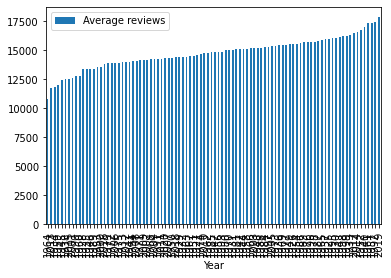

In [87]:
avg_review_by_year.toPandas().plot(x="Year", y="Average reviews", kind="bar")